In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/ushape.csv')

In [7]:
new_column_names = ['X', 'Y', 'class']

# Rename the columns
df.columns = new_column_names

In [8]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


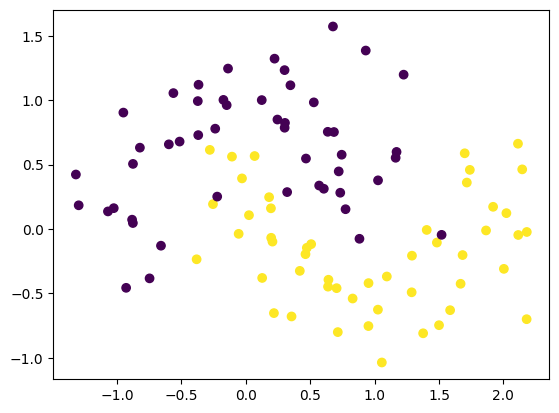

In [9]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.get_weights()

[array([[ 1.232651  , -1.9302828 ,  1.62258   ,  1.634931  ,  0.8180246 ,
         -0.21904697, -0.50188524, -0.26481766, -1.6350253 ,  0.15748136],
        [ 0.11693865, -0.80224144,  1.3856786 , -0.34534588,  0.9619386 ,
         -1.2876966 , -0.916958  , -0.17998241, -0.9680271 , -1.8054042 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.36512928e-02, -5.87022126e-01,  2.30170682e-01,
          1.04135320e-01,  2.31703684e-01,  4.72137898e-01,
          4.91325185e-02, -2.76332051e-01, -2.08075661e-02,
          5.04530311e-01],
        [-1.91296250e-01, -7.18688667e-01,  6.63765430e-01,
         -5.07516563e-02,  7.17854321e-01,  2.02978060e-01,
          3.83661002e-01, -4.67219651e-01, -3.24643344e-01,
         -1.75910950e-01],
        [-4.52456683e-01,  4.71928805e-01, -6.20634817e-02,
          1.43563375e-01,  8.31319466e-02,  7.63977990e-02,
          2.14144275e-01,  5.03045857e-01,  1.08067073e-01,
         -2.7453061

In [14]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[ 0.41191274,  0.7256856 , -0.9335185 ,  0.30697554,  0.36054564,
         -0.7457734 ,  0.40661237, -0.4266189 , -0.17399506, -0.16187736],
        [-1.1601225 ,  0.6758169 ,  0.97836757,  0.16031456,  0.13383265,
          0.07587582,  0.3388854 ,  0.53512025,  0.6383072 , -0.03164551]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.07751332e-01, -6.99188048e-03,  3.60682845e-01,
         -1.40491322e-01,  1.44930795e-01, -2.14177556e-02,
          2.50980377e-01, -4.82718050e-01, -3.78402382e-01,
          1.08220287e-01],
        [-5.93942702e-01, -8.94734621e-01,  1.25083551e-01,
         -7.38466680e-02,  7.01860189e-02,  9.93446559e-02,
         -2.71132350e-01,  5.30827761e-01,  3.39760453e-01,
         -1.96593553e-01],
        [-7.60605991e-01, -5.02477825e-01,  2.75044087e-02,
          1.43822119e-01,  5.40175855e-01, -3.63656133e-01,
         -1.30477238e+00,  4.33789492e-02,  7.57627189e-02,
          1.4732813

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.4914 - loss: 0.7128 - val_accuracy: 0.5000 - val_loss: 0.7328
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5383 - loss: 0.7035 - val_accuracy: 0.5000 - val_loss: 0.7266
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5696 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.7208
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5032 - loss: 0.7029 - val_accuracy: 0.5000 - val_loss: 0.7149
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4914 - loss: 0.6983 - val_accuracy: 0.4500 - val_loss: 0.7094
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5807 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.7042
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5622 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5417 - loss: 0.6890 - val_accuracy: 0.5500 - val_loss

In [20]:
model.get_weights()

[array([[ 0.637016  ,  0.9094028 , -0.89813626,  0.3424307 ,  0.257253  ,
         -0.9358837 ,  0.53136456, -0.4670441 , -0.22539452, -0.36294475],
        [-1.4020469 ,  0.7737016 ,  1.0235808 , -0.05575084,  0.2491203 ,
         -0.00595073,  0.13501579,  0.5741511 ,  0.8218187 , -0.09655046]],
       dtype=float32),
 array([ 0.16089152,  0.10447963, -0.00637434, -0.21643545, -0.07775702,
        -0.08530776,  0.21320443, -0.05789469,  0.10019562, -0.03328855],
       dtype=float32),
 array([[ 4.9635012e-02, -6.9918805e-03,  6.0058975e-01, -3.0015272e-01,
          3.9841595e-01, -9.9152155e-02,  1.5225522e-01, -7.4062693e-01,
         -5.0050545e-01,  3.5911992e-01],
        [-5.1668352e-01, -8.9473462e-01,  2.3614325e-01,  1.0960388e-01,
          2.7111447e-01,  1.2578206e-01, -3.4817386e-01,  6.4468652e-01,
          4.3024090e-01, -1.2369964e-01],
        [-6.7528695e-01, -5.0247782e-01, -1.9315243e-02,  2.4944878e-01,
          5.7449830e-01, -2.7166942e-01, -1.3331032e+00,  1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

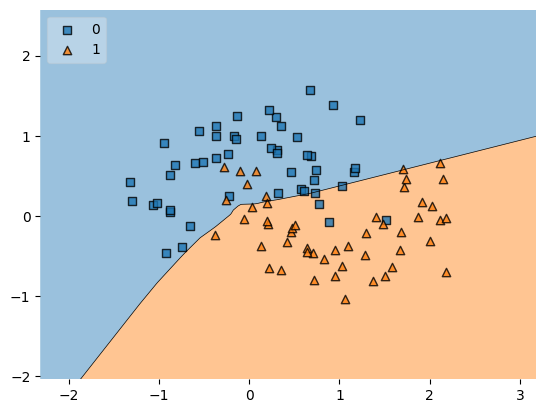

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [22]:
(np.random.randn(10,10)*0.01).min()

-0.020537534965301626

In [23]:
(np.random.randn(10,10)*0.01).max()

0.022459145570528197